In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
from collections import defaultdict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



# Read the dataset

In [3]:
data = pd.read_csv("../merged_200_final_1.csv")

In [4]:
data.pid.unique().sum()

1914775

In [5]:
data

,pid,track_uri,artist_name,artist_uri,track_name,album_name,duration_ms_x,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.810,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
1,123,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.810,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
2,218,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.810,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
3,342,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.810,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
4,382,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.810,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68774,1084,spotify:track:4kfm1uI9QGaoN9qm6CkAMn,Linkin Park,spotify:artist:6XyY86QOPPrYVGvF9ch6wz,What I've Done,Minutes To Midnight,205613,0.623,0.930,5,...,0.1380,0.287,120.119,audio_features,4kfm1uI9QGaoN9qm6CkAMn,spotify:track:4kfm1uI9QGaoN9qm6CkAMn,https://api.spotify.com/v1/tracks/4kfm1uI9QGao...,https://api.spotify.com/v1/audio-analysis/4kfm...,205613,4
68775,1668,spotify:track:4kfm1uI9QGaoN9qm6CkAMn,Linkin Park,spotify:artist:6XyY86QOPPrYVGvF9ch6wz,What I've Done,Minutes To Midnight,205613,0.623,0.930,5,...,0.1380,0.287,120.119,audio_features,4kfm1uI9QGaoN9qm6CkAMn,spotify:track:4kfm1uI9QGaoN9qm6CkAMn,https://api.spotify.com/v1/tracks/4kfm1uI9QGao...,https://api.spotify.com/v1/audio-analysis/4kfm...,205613,4
68776,1938,spotify:track:4kfm1uI9QGaoN9qm6CkAMn,Linkin Park,spotify:artist:6XyY86QOPPrYVGvF9ch6wz,What I've Done,Minutes To Midnight,205613,0.623,0.930,5,...,0.1380,0.287,120.119,audio_features,4kfm1uI9QGaoN9qm6CkAMn,spotify:track:4kfm1uI9QGaoN9qm6CkAMn,https://api.spotify.com/v1/tracks/4kfm1uI9QGao...,https://api.spotify.com/v1/audio-analysis/4kfm...,205613,4
68777,326,spotify:track:0aGQHMr7bc23Y9Ts84ffop,Red Hot Chili Peppers,spotify:artist:0L8ExT028jH3ddEcZwqJJ5,Around The World,Californication,238733,0.504,0.960,0,...,0.0613,0.774,96.682,audio_features,0aGQHMr7bc23Y9Ts84ffop,spotify:track:0aGQHMr7bc23Y9Ts84ffop,https://api.spotify.com/v1/tracks/0aGQHMr7bc23...,https://api.spotify.com/v1/audio-analysis/0aGQ...,238733,4


In [7]:
unique_pids = data.pid.unique().tolist()

In [8]:
unique_pids


[0,
 123,
 218,
 342,
 382,
 844,
 1064,
 1247,
 1355,
 1464,
 1625,
 1788,
 1841,
 1857,
 38,
 262,
 355,
 389,
 635,
 717,
 782,
 795,
 815,
 833,
 1083,
 1135,
 1168,
 1296,
 1530,
 1538,
 1549,
 50,
 161,
 180,
 205,
 284,
 314,
 316,
 359,
 367,
 380,
 416,
 499,
 516,
 572,
 747,
 779,
 808,
 825,
 839,
 920,
 1010,
 1298,
 1314,
 1482,
 1543,
 1621,
 1623,
 1658,
 1732,
 1798,
 1803,
 211,
 594,
 904,
 1070,
 1292,
 1318,
 1572,
 1723,
 1853,
 1874,
 1980,
 105,
 115,
 121,
 237,
 403,
 427,
 452,
 471,
 560,
 575,
 643,
 656,
 668,
 697,
 721,
 734,
 736,
 848,
 913,
 980,
 990,
 992,
 1067,
 1126,
 1130,
 1169,
 1174,
 1179,
 1253,
 1343,
 1468,
 1516,
 1654,
 1822,
 1906,
 5,
 53,
 106,
 150,
 207,
 426,
 439,
 526,
 542,
 642,
 661,
 663,
 687,
 701,
 788,
 942,
 1091,
 1165,
 1397,
 1546,
 1694,
 405,
 517,
 854,
 1003,
 1081,
 1104,
 1283,
 1371,
 651,
 944,
 1230,
 1563,
 1947,
 41,
 71,
 94,
 245,
 299,
 396,
 584,
 1589,
 1604,
 1807,
 65,
 277,
 309,
 422,
 483,
 873,


In [9]:
#Sample any 100 pids
import random
random_pids = random.sample(unique_pids, 100)


In [10]:
random_pids

[1100,
 607,
 1153,
 1372,
 1558,
 1746,
 683,
 1406,
 1263,
 1221,
 710,
 1321,
 437,
 1329,
 1465,
 940,
 1868,
 1889,
 1778,
 449,
 1363,
 522,
 313,
 730,
 609,
 426,
 1387,
 820,
 994,
 1443,
 166,
 1296,
 356,
 632,
 1035,
 214,
 1685,
 1752,
 1602,
 285,
 321,
 1584,
 767,
 126,
 822,
 1191,
 1414,
 974,
 1401,
 812,
 646,
 1693,
 295,
 1454,
 138,
 543,
 1667,
 1423,
 1126,
 1011,
 1442,
 739,
 1735,
 124,
 1807,
 26,
 231,
 1417,
 217,
 1525,
 531,
 947,
 445,
 1,
 809,
 1562,
 600,
 209,
 1396,
 1420,
 366,
 1598,
 1160,
 1032,
 261,
 329,
 1426,
 1545,
 778,
 1808,
 34,
 745,
 1339,
 1327,
 277,
 337,
 1067,
 1824,
 980,
 566]

In [11]:
data_100 = data[data['pid'].isin(random_pids)]

In [12]:
data_100

,pid,track_uri,artist_name,artist_uri,track_name,album_name,duration_ms_x,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
31,1296,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,In The Zone,198800,0.774,0.838,5,...,0.2420,0.924,143.040,audio_features,6I9VzXrHxO9rA9A5euc8Ak,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,198800,4
121,980,spotify:track:1lzr43nnXAijIGYnCT8M8H,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,Hot Shot,227600,0.853,0.606,0,...,0.3130,0.654,94.759,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4
125,1067,spotify:track:1lzr43nnXAijIGYnCT8M8H,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,Hot Shot,227600,0.853,0.606,0,...,0.3130,0.654,94.759,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4
126,1126,spotify:track:1lzr43nnXAijIGYnCT8M8H,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,Hot Shot,227600,0.853,0.606,0,...,0.3130,0.654,94.759,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4
160,426,spotify:track:0XUfyU2QviPAs6bxSpXYG4,Usher,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Yeah!,Confessions,250373,0.881,0.788,2,...,0.0377,0.592,104.997,audio_features,0XUfyU2QviPAs6bxSpXYG4,spotify:track:0XUfyU2QviPAs6bxSpXYG4,https://api.spotify.com/v1/tracks/0XUfyU2QviPA...,https://api.spotify.com/v1/audio-analysis/0XUf...,250373,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68522,1067,spotify:track:48UPSzbZjgc449aqz8bxox,Red Hot Chili Peppers,spotify:artist:0L8ExT028jH3ddEcZwqJJ5,Californication,Californication,329733,0.592,0.767,9,...,0.1270,0.328,96.483,audio_features,48UPSzbZjgc449aqz8bxox,spotify:track:48UPSzbZjgc449aqz8bxox,https://api.spotify.com/v1/tracks/48UPSzbZjgc4...,https://api.spotify.com/v1/audio-analysis/48UP...,329733,4
68546,1414,spotify:track:5cPfmNMC3AENizySC5oPu2,Sublime,spotify:artist:0EdvGhlC1FkGItLOWQzG4J,Wrong Way,Sublime,136400,0.620,0.682,9,...,0.1030,0.944,74.483,audio_features,5cPfmNMC3AENizySC5oPu2,spotify:track:5cPfmNMC3AENizySC5oPu2,https://api.spotify.com/v1/tracks/5cPfmNMC3AEN...,https://api.spotify.com/v1/audio-analysis/5cPf...,136400,4
68569,1420,spotify:track:47hGj4XTeK0bjo4Ko42K1g,Hollyn,spotify:artist:2E6Nnh7AAOVajEHHRDALav,Alone (feat. Tru),Hollyn,226293,0.597,0.679,2,...,0.0531,0.503,171.982,audio_features,47hGj4XTeK0bjo4Ko42K1g,spotify:track:47hGj4XTeK0bjo4Ko42K1g,https://api.spotify.com/v1/tracks/47hGj4XTeK0b...,https://api.spotify.com/v1/audio-analysis/47hG...,226293,4
68685,812,spotify:track:4HGIPyqDxSf863tPOwXiLJ,Samuel E. Wright,spotify:artist:6Id8rcDNyBXPcgKQVfQ8rX,"Kiss the Girl - From ""The Little Mermaid""/Soun...",Little Mermaid,163400,0.667,0.239,0,...,0.1040,0.721,134.857,audio_features,4HGIPyqDxSf863tPOwXiLJ,spotify:track:4HGIPyqDxSf863tPOwXiLJ,https://api.spotify.com/v1/tracks/4HGIPyqDxSf8...,https://api.spotify.com/v1/audio-analysis/4HGI...,163400,4


In [13]:
data_100.isnull().sum()

pid                 0
track_uri           0
artist_name         0
artist_uri          0
track_name          0
album_name          0
duration_ms_x       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms_y       0
time_signature      0
dtype: int64

In [14]:
#Collect the pids and 26 songs of the pids
final_df = pd.DataFrame()
for i in random_pids:
    rslt_df = data_100.loc[data_100['pid'] == i]
    rslt_df = rslt_df[:26]
    if len(rslt_df) > 10: 
        final_df = final_df.append(rslt_df)

In [16]:
final_df.isnull().sum()

pid                 0
track_uri           0
artist_name         0
artist_uri          0
track_name          0
album_name          0
duration_ms_x       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms_y       0
time_signature      0
dtype: int64

In [149]:
final_df.to_csv("100pids2600songs_data.csv")

In [150]:
final_df.describe()

,pid,duration_ms_x,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature
count,1632.000000,1632.000000,1632.000000,1632.00000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,942.723652,233243.498162,0.631667,0.64198,5.112132,-7.003893,0.633578,0.093866,0.202435,0.022782,0.181796,0.500493,122.238939,233229.329657,3.963848
std,541.388719,56735.223939,0.156073,0.18863,3.607207,3.036215,0.481974,0.095187,0.248439,0.108439,0.142770,0.232789,28.119539,56709.481976,0.281089
min,4.000000,78200.000000,0.143000,0.04390,0.000000,-20.514000,0.000000,0.022900,0.000015,0.000000,0.023200,0.034000,60.014000,78200.000000,1.000000
25%,468.000000,201580.000000,0.530000,0.52375,1.000000,-8.268750,0.000000,0.037300,0.024600,0.000000,0.092575,0.324000,100.033000,201580.000000,4.000000
50%,1007.000000,225026.000000,0.647000,0.66700,5.000000,-6.397000,1.000000,0.052700,0.087300,0.000001,0.126000,0.492000,120.621500,225027.000000,4.000000
75%,1365.000000,255679.750000,0.744000,0.78725,8.000000,-4.902500,1.000000,0.109000,0.281000,0.000117,0.229500,0.683000,139.954750,255680.750000,4.000000
max,1910.000000,824133.000000,0.979000,0.98800,11.000000,-1.629000,1.000000,0.869000,0.982000,0.928000,0.980000,0.990000,212.137000,824133.000000,5.000000


# Get data of interest from the Data frame

In [151]:
data_new = final_df[['pid', 'artist_name', 'track_uri',
                           'track_name', 'album_name', 'duration_ms_x',
                           'acousticness',
                           'danceability', 'energy', 'instrumentalness', 'key',
                           'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
                           'time_signature', 'valence']] #keep columns of interest

In [152]:
data_new.describe()

,pid,duration_ms_x,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.00000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,942.723652,233243.498162,0.202435,0.631667,0.64198,0.022782,5.112132,0.181796,-7.003893,0.633578,0.093866,122.238939,3.963848,0.500493
std,541.388719,56735.223939,0.248439,0.156073,0.18863,0.108439,3.607207,0.142770,3.036215,0.481974,0.095187,28.119539,0.281089,0.232789
min,4.000000,78200.000000,0.000015,0.143000,0.04390,0.000000,0.000000,0.023200,-20.514000,0.000000,0.022900,60.014000,1.000000,0.034000
25%,468.000000,201580.000000,0.024600,0.530000,0.52375,0.000000,1.000000,0.092575,-8.268750,0.000000,0.037300,100.033000,4.000000,0.324000
50%,1007.000000,225026.000000,0.087300,0.647000,0.66700,0.000001,5.000000,0.126000,-6.397000,1.000000,0.052700,120.621500,4.000000,0.492000
75%,1365.000000,255679.750000,0.281000,0.744000,0.78725,0.000117,8.000000,0.229500,-4.902500,1.000000,0.109000,139.954750,4.000000,0.683000
max,1910.000000,824133.000000,0.982000,0.979000,0.98800,0.928000,11.000000,0.980000,-1.629000,1.000000,0.869000,212.137000,5.000000,0.990000


In [119]:
data_new

,pid,artist_name,track_uri,track_name,album_name,duration_ms_x,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
25524,1116,Macklemore & Ryan Lewis,spotify:track:3AYcyxEACnmE6d96RPubID,Thrift Shop (feat. Wanz),The Heist [Deluxe Edition],235613,0.06190,0.781,0.526,0.000000,6,0.0457,-6.985,0,0.2930,94.992,4,0.662
41958,1116,Bubba Sparxxx,spotify:track:0k6HUzaRHpQ3eEWr1C7Esh,Ms. New Booty - feat. Ying Yang Twins and Mr. ...,Ms. New Booty,252653,0.01600,0.640,0.620,0.000000,1,0.0831,-5.931,1,0.4160,129.370,5,0.609
68188,1116,Young Dro,spotify:track:2OqYarizUUGzSSNHPrDEii,Shoulder Lean (feat. T.I.) - Featuring T.I. Ex...,Best Thang Smokin',258680,0.04710,0.700,0.518,0.000000,4,0.1000,-7.191,0,0.1770,75.973,4,0.542
22193,1245,Wham!,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Last Christmas,LAST CHRISTMAS,262960,0.18900,0.735,0.478,0.000002,2,0.3550,-12.472,1,0.0293,107.682,4,0.947
22215,1245,Mariah Carey,spotify:track:0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Merry Christmas,241106,0.16400,0.336,0.627,0.000000,7,0.0708,-7.463,1,0.0384,150.273,4,0.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47790,1976,Melanie Martinez,spotify:track:360Wr96ywrCQq4kTAJ8Pq6,Pacify Her,Cry Baby,220013,0.04670,0.576,0.593,0.000767,9,0.2370,-6.024,0,0.0306,157.993,4,0.373
47796,1976,Melanie Martinez,spotify:track:3K1tdhoeE6koNnWgAxEK9Y,Mrs. Potato Head,Cry Baby,217506,0.17400,0.517,0.622,0.000000,1,0.1050,-3.536,0,0.0577,170.154,4,0.463
50151,1976,The Strumbellas,spotify:track:2H6dHxAxGq5oQ9EiinNpXT,Spirits,Hope,203653,0.16900,0.540,0.729,0.000000,0,0.1120,-3.709,1,0.0276,80.453,4,0.779
65145,1976,Lana Del Rey,spotify:track:2nMeu6UenVvwUktBCpLMK9,Young And Beautiful,Young And Beautiful,236053,0.26200,0.324,0.416,0.000037,11,0.1100,-8.920,0,0.0368,113.986,4,0.151


# Split the Data in Training-Testing

In [153]:
# Train-val-test split (20%)
train, test = train_test_split(data_new, test_size=0.2, random_state=48, stratify = final_df['pid'])
train, val = train_test_split(train, test_size=0.2, random_state=48, stratify = train['pid'])

In [154]:
train['index'] = np.arange(1, len(train)+1) #append index column for merging scaled data

In [155]:
scaleCols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
             'key', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature'] #mode excluded from analysis
scaler = StandardScaler()
scaler.fit(train.loc[:, scaleCols])
train_scaled = train.copy() #copy original master data frame
train_scaled[scaleCols] = scaler.transform(train_scaled[scaleCols]) #scale transform cluster columns
train_scaled['index'] = np.arange(1, len(train_scaled)+1) #reappend index column
train_scaled = train_scaled.rename(columns = {'acousticness': 'acousticness_scaled',
                                              'danceability': 'danceability_scaled',
                                              'energy': 'energy_scaled',
                                              'instrumentalness': 'instrumentalness_scaled',
                                              'key': 'key_scaled',
                                              'liveness': 'liveness_scaled',
                                              'loudness': 'loudness_scaled',
                                              'speechiness': 'speechiness_scaled',
                                              'tempo': 'tempo_scaled',
                                              'valence': 'valence_scaled',
                                              'time_signature': 'time_signature_scaled'})
joinCols = ['pid', 'track_uri', 'artist_name',
            'track_name', 'album_name', 'duration_ms_x', 
             'mode']
train_new = train.merge(train_scaled, on = joinCols, how = 'outer') #merge scaled data with original data

In [156]:
train_new

,pid,artist_name,track_uri,track_name,album_name,duration_ms_x,acousticness,danceability,energy,instrumentalness,...,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled,index_y
0,450,Tove Lo,spotify:track:7cgu4JBW3hq1GwTM1ilkKQ,Talking Body,Queen Of The Clouds,238426,0.09660,0.736,0.761,0.000000,...,0.631133,-0.198839,-0.285814,-0.697949,0.490958,-0.645975,-0.084649,0.137319,-1.653413,1
1,782,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Toxic,In The Zone,198800,0.02490,0.774,0.838,0.025000,...,1.033187,0.042301,-0.007984,0.467824,0.992737,0.186158,0.717550,0.137319,1.797390,2
2,457,Selena Gomez,spotify:track:6ZANrVuAMp2rpjhfbOuJly,Same Old Love,Revival,229080,0.02230,0.672,0.593,0.000000,...,-0.246074,-0.198839,1.658997,0.263431,0.961355,-0.681253,-0.849873,0.137319,-0.273092,3
3,712,The Who,spotify:track:2KmEgiY8fQs0G6WNxtzQKr,Baba O'Riley,Who's Next,300400,0.31300,0.489,0.724,0.185000,...,0.437939,1.585593,-0.007984,0.796314,-0.462913,-0.631449,-0.178896,0.137319,-1.500044,4
4,385,Train,spotify:track:0VZ9xPNa6ROafP6GYYuv2S,Marry Me,"Save Me, San Francisco (Golden Gate Edition)",205453,0.82900,0.366,0.269,0.000017,...,-1.937831,-0.198678,-1.397134,-0.510345,-0.492007,-0.698891,-1.248275,0.137319,-0.043038,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1463,Kungs,spotify:track:0tICYNayWWhH9GPeFrfjfD,This Girl (Kungs Vs. Cookin' On 3 Burners) - K...,Layers,195546,0.08000,0.793,0.729,0.000031,...,0.464046,-0.198540,-1.397134,1.015307,0.712917,-0.587871,-0.015957,0.137319,-0.060079,1040
1040,51,Zara Larsson,spotify:track:6hmhG1b4LEyNuashVvuIAo,Never Forget You,So Good,213427,0.00312,0.583,0.732,0.000010,...,0.479711,-0.198744,1.658997,0.664918,0.399755,-0.522504,0.820327,0.137319,-0.963252,1041
1041,1448,Taylor Swift,spotify:track:0z9UVN8VBHJ9HdfYsOuuNf,Safe & Sound - from The Hunger Games Soundtrack,The Hunger Games: Songs From District 12 And B...,240066,0.88300,0.471,0.300,0.000010,...,-1.775965,-0.198737,0.547677,-0.789196,-1.260530,-0.706154,0.762080,0.137319,-0.907869,1042
1042,500,Bill Withers,spotify:track:3M8FzayQWtkvOhqMn2V4T2,Lean on Me,Still Bill,258834,0.78200,0.619,0.220,0.000012,...,-2.193683,-0.198724,-1.397134,-0.393548,-2.252973,-0.304614,-1.645771,0.137319,-0.336996,1043


In [157]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled', 'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled'] #variables to cluster
train_new[clusterCols].corr() #check variable correlations

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled
acousticness_scaled,1.000000,-0.294271,-0.625843,0.030677,-0.030007,-0.078723,-0.494395,-0.098131,-0.072405,-0.169664,-0.163320
danceability_scaled,-0.294271,1.000000,0.089666,-0.026504,-0.052327,-0.075106,0.139439,0.170839,-0.200239,0.167487,0.300158
energy_scaled,-0.625843,0.089666,1.000000,0.034840,0.007296,0.194929,0.711201,0.042855,0.159343,0.179154,0.381197
instrumentalness_scaled,0.030677,-0.026504,0.034840,1.000000,-0.064768,0.009665,-0.074169,-0.065914,0.028041,-0.023973,-0.036382
key_scaled,-0.030007,-0.052327,0.007296,-0.064768,1.000000,0.020262,-0.025289,-0.032253,-0.002926,0.009471,0.026789
liveness_scaled,-0.078723,-0.075106,0.194929,0.009665,0.020262,1.000000,0.097172,0.129941,0.067283,0.000264,0.057861
loudness_scaled,-0.494395,0.139439,0.711201,-0.074169,-0.025289,0.097172,1.000000,0.052437,0.122611,0.111279,0.119781
speechiness_scaled,-0.098131,0.170839,0.042855,-0.065914,-0.032253,0.129941,0.052437,1.000000,0.141358,0.056744,-0.025328
tempo_scaled,-0.072405,-0.200239,0.159343,0.028041,-0.002926,0.067283,0.122611,0.141358,1.000000,-0.044765,0.010497
time_signature_scaled,-0.169664,0.167487,0.179154,-0.023973,0.009471,0.000264,0.111279,0.056744,-0.044765,1.000000,0.118382


In [158]:
train_new.isnull().sum()

pid                        0
artist_name                0
track_uri                  0
track_name                 0
album_name                 0
duration_ms_x              0
acousticness               0
danceability               0
energy                     0
instrumentalness           0
key                        0
liveness                   0
loudness                   0
mode                       0
speechiness                0
tempo                      0
time_signature             0
valence                    0
index_x                    0
acousticness_scaled        0
danceability_scaled        0
energy_scaled              0
instrumentalness_scaled    0
key_scaled                 0
liveness_scaled            0
loudness_scaled            0
speechiness_scaled         0
tempo_scaled               0
time_signature_scaled      0
valence_scaled             0
index_y                    0
dtype: int64

# Plot the elbow curve

In [159]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'valence_scaled'] #variables to cluster #time_signature_scaled

distortion = list()
for k in range(1, 10): #started with range [1, 51] and narrowed down to this range 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train_new.loc[:, clusterCols])
    distortion.append(kmeans.inertia_) #append distortion value to list



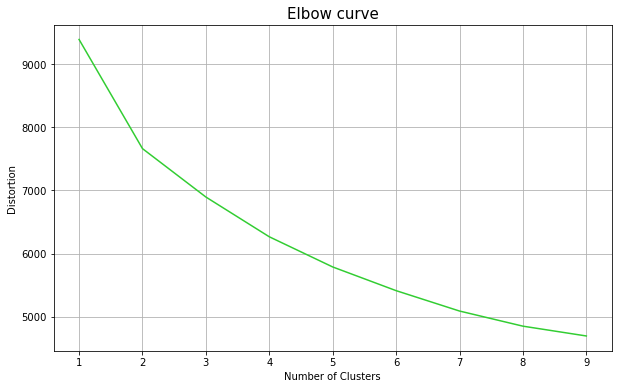

In [160]:
#plot elbow curves 
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), distortion, c = 'limegreen', label = 'distortion')
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Distortion', fontsize = 10)
plt.grid(True)
plt.title('Elbow curve', fontsize = 15)
plt.show()

In [161]:
#Create the Clusters and centroids
def makeCluster(df, n, rs, cols):
    '''
    Parameters:
    1) df: master data frame
    2) n: number of clusters
    3) rs: random state
    4) cols: list of clustering variables
    '''
    #copy dataframe
    dfCluster = df.copy()

    #fit clusters
    kmeans = KMeans(n_clusters = n, random_state = rs)
    kmeans.fit(dfCluster.loc[:, cols])

    #get location of cluster centroids and label
    center = kmeans.cluster_centers_
    label = kmeans.labels_
    dfCluster['cluster_label'] = label
    dfCluster['cluster_label'] = dfCluster['cluster_label'] + 1 #increment by 1 so 0 implies non-existence in prediction
    
    #append centroids to data frame
    centroids = defaultdict(list)
    for col in cols:
        centroids['columns'].append(col)
    for a in range(len(center)):
        for b in range(len(center[0])):
            centroids['c'+ str(a)].append(center[a][b])
            dfCluster['c'+ str(a) + cols[b]] = center[a][b]

    return dfCluster, pd.DataFrame.from_dict(centroids)

In [162]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled',
               'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled'] #variables to cluster

In [163]:
train_cluster, train_centroids = makeCluster(train_new, 8, 48, clusterCols)

# Rank the centroids

In [164]:
#rank centroids
def rankC(dfCentroid, n):
    rankC = defaultdict(list)
    for i in range(n):
        rankC['cluster'].append(i)
        for j in range(n):
            rankC[str(j)].append(euclidean(dfCentroid['c'+str(i)], dfCentroid['c'+str(j)]))    
    rankC = pd.DataFrame(rankC)
    orderRankC = defaultdict(list)
    for i in range(n):
        orderRankC[str(i)] = rankC[str(i)].sort_values(ascending = True).index.values
    return orderRankC

In [165]:
orderRankc = rankC(train_centroids, 5)

In [166]:
prediction_cluster = train_cluster[['pid','track_uri', 'artist_name', 'track_name', 'cluster_label']]

In [167]:
mode_artist = prediction_cluster.groupby(['cluster_label', 'artist_name'])['pid'].count().reset_index()
mode_artist = mode_artist.rename(columns = {'pid': 'mode_artist'})
prediction_cluster = prediction_cluster.merge(mode_artist, on = ['cluster_label', 'artist_name'])

In [168]:
mode_track = prediction_cluster.groupby(['cluster_label', 'track_name'])['pid'].count().reset_index()
mode_track = mode_track.rename(columns = {'pid': 'mode_track'})
prediction_cluster = prediction_cluster.merge(mode_track, on = ['cluster_label', 'track_name'])

In [26]:
def nholdout(playlist_id, df):
    '''Pass in a playlist id to get number of songs held out in val/test set'''

    return len(df[df.pid == playlist_id].track_uri)

def cPredict(dfCluster, playlist_id, clusterRank, df):

    #k = nholdout(playlist_id, df)*15 #number of predictions
    k = 15
    print("k ", k)
    pred = list() #cache list for prediction

    playlist = dfCluster[dfCluster['pid'] == playlist_id] #get playlist from cluster data frame
    tracks = playlist.track_uri.values #list of existing tracks

    #refined model - prioritize artist
    artistCNT = playlist.groupby('artist_name').agg({
        'track_uri': len
    }).reset_index().sort_values(by = 'track_uri', ascending = False) #get count of artist by name

    #get cluster label count from playlist
    clusterCNT = playlist.groupby('cluster_label').agg({
    'pid': len
    }).reset_index().sort_values(by = 'pid', ascending = False)

    #cluster labels order by occurance in descending order
    labels = clusterCNT.cluster_label.values.tolist()

    #populate cluster labels based on computed euclidean distances
    for label in labels:
        add = clusterRank[str(label)]
        for c in add:
            if c not in labels:
                labels.append(c)

    #predict based on cluster popularity
    for label in labels:
        fit = dfCluster[dfCluster['cluster_label'] == label] #subset tracks with the same label
        rankTrack = fit.sort_values(by = ['mode_artist','mode_track'], ascending = [False,False]) #rank tracks in fit by artist and track
        pred_uri = rankTrack.track_uri.values
        print(pred_uri, "pred_uri")
        for uri in pred_uri:
            if uri not in tracks and uri not in pred:
                pred.append(uri)
                if len(pred) == k:
                    break
            if len(pred) == k:
                break
        if len(pred) == k:
            break

    return pred


In [170]:
#Select a demo Playlist Number
example = prediction_cluster[prediction_cluster.pid == 1463]
example

,pid,track_uri,artist_name,track_name,cluster_label,mode_artist,mode_track
8,1463,spotify:track:4KW1lqgSr8TKrvBII0Brf8,Kanye West,Father Stretch My Hands Pt. 1,8,5,2
57,1463,spotify:track:57evRskKe47TvzG96SLLTM,Russ,Pull The Trigger,2,8,2
189,1463,spotify:track:5zaIgI9HNUPIcfaeVRlxGa,Trinidad James,Just A Lil' Thick (She Juicy),2,1,1
196,1463,spotify:track:2JI71GHwq2LN8mtq3iCLYo,O.T. Genasis,CoCo,7,1,1
208,1463,spotify:track:1wHZx0LgzFHyeIZkUydNXq,Travis Scott,Antidote,3,2,2
289,1463,spotify:track:4w7yrP4RAeeyhfG9nJqQvS,Big Sean,I Don't Fuck With You,6,5,4
330,1463,spotify:track:1L0rvFTlpoR8rHxdR4lTSN,Sage The Gemini,Gas Pedal,6,1,1
394,1463,spotify:track:3kZoay4ANo86ehb6s4RwS9,Chamillionaire,Ridin',7,1,1
397,1463,spotify:track:5tFep7dXGd7vEJ668wTPux,Gucci Mane,Both (feat. Drake),2,2,2
452,1463,spotify:track:7KOlJ92bu51cltsD9KU5I7,Migos,T-Shirt,7,2,2


In [173]:
#predict for demo
pred_example = cPredict(prediction_cluster, 1463, orderRankc, val)


k  15
['spotify:track:439TlnnznSiBbQbgXiBqAd'
 'spotify:track:439TlnnznSiBbQbgXiBqAd'
 'spotify:track:1bxEpNR75Hq3T2oF9AZjt8'
 'spotify:track:4oFtLSgHyZPNYDCcANhTnO'
 'spotify:track:6HZILIRieu8S0iqY8kIKhj'
 'spotify:track:4fVqQKbROkz8Z9FFJS7vls'
 'spotify:track:5ujh1I7NZH5agbwf7Hp8Hc'
 'spotify:track:1wf4LnpdAhLaoI2WwYDKAE'
 'spotify:track:1zCi4cVFqe6ja16MeGZKRN'
 'spotify:track:3I0FBDc1c1BLNtXWKVjmFg'
 'spotify:track:72hFOhhhnOJZnnp6uVOgPn'
 'spotify:track:40IQooNkPRVtn4zlE3ZFpA'
 'spotify:track:6REbwUNlppTfcnV4d4ZoZi'
 'spotify:track:6QvxTX9zvo4u7XhP9vOP3n'
 'spotify:track:5mB1bWU8VueYVxuvcLPn2B'
 'spotify:track:5mB1bWU8VueYVxuvcLPn2B'
 'spotify:track:57evRskKe47TvzG96SLLTM'
 'spotify:track:57evRskKe47TvzG96SLLTM'
 'spotify:track:2ANLarE8yHVsLWW21nj79M'
 'spotify:track:2ANLarE8yHVsLWW21nj79M'
 'spotify:track:2plFaDNZayLbtA9Ht1yCEo'
 'spotify:track:26OhjtaTamFocE08t83ml6'
 'spotify:track:3pndPhlQWjuSoXhcIIdBjv'
 'spotify:track:1ec64Z9X5poSYPT4N1QNm6'
 'spotify:track:5MUvVmyKD6bBY0XDeW

In [174]:
#visualize tracks predicted for the example data set
dfpred_example = prediction_cluster[prediction_cluster.track_uri.isin(pred_example)]
dfpred_example

,pid,track_uri,artist_name,track_name,cluster_label,mode_artist,mode_track
15,190,spotify:track:1bxEpNR75Hq3T2oF9AZjt8,Kendrick Lamar,u,2,14,1
16,190,spotify:track:4oFtLSgHyZPNYDCcANhTnO,Kendrick Lamar,Institutionalized,2,14,1
17,190,spotify:track:439TlnnznSiBbQbgXiBqAd,Kendrick Lamar,m.A.A.d city,2,14,2
18,782,spotify:track:439TlnnznSiBbQbgXiBqAd,Kendrick Lamar,m.A.A.d city,2,14,2
19,403,spotify:track:6HZILIRieu8S0iqY8kIKhj,Kendrick Lamar,DNA.,2,14,1
20,190,spotify:track:4fVqQKbROkz8Z9FFJS7vls,Kendrick Lamar,HiiiPower,2,14,1
21,190,spotify:track:5ujh1I7NZH5agbwf7Hp8Hc,Kendrick Lamar,Swimming Pools (Drank) - Extended Version,2,14,1
22,190,spotify:track:1wf4LnpdAhLaoI2WwYDKAE,Kendrick Lamar,Compton,2,14,1
23,190,spotify:track:1zCi4cVFqe6ja16MeGZKRN,Kendrick Lamar,Poetic Justice,2,14,1
24,190,spotify:track:3I0FBDc1c1BLNtXWKVjmFg,Kendrick Lamar,untitled 02 | 06.23.2014.,2,14,1


In [175]:
#get the true samples
true_example = val[val.pid == 1463]
true_example

,pid,artist_name,track_uri,track_name,album_name,duration_ms_x,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
49436,1463,Rittz,spotify:track:10sNkTjcPhK9A112WCMIbv,Turn Down,Next to Nothing (Deluxe Edition),251693,0.139000,0.763,0.751,0.000000,1,0.2430,-7.877,1,0.1450,127.995,4,0.556
10529,1463,Kendrick Lamar,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,HUMBLE.,DAMN.,177000,0.000282,0.908,0.621,0.000054,1,0.0958,-6.638,0,0.1020,150.011,4,0.421
11049,1463,Young Thug,spotify:track:55OdqrG8WLmsYyY1jijD9b,Wyclef Jean,JEFFERY,236293,0.124000,0.863,0.576,0.000000,5,0.1430,-5.687,0,0.2390,132.054,4,0.832
35334,1463,Rae Sremmurd,spotify:track:6fujklziTHa8uoM5OQSfIo,Black Beatles,SremmLife 2,291893,0.142000,0.794,0.632,0.000000,0,0.1280,-6.163,1,0.0649,145.926,4,0.355


In [177]:
#predict for demo using updated model
pred_example_updated = cPredict(prediction_cluster, 1463, orderRankc, val)
dfpred_example_updated = prediction_cluster[prediction_cluster.Track_uri.isin(pred_example_updated)]
dfpred_example_updated

k  15
['spotify:track:439TlnnznSiBbQbgXiBqAd'
 'spotify:track:439TlnnznSiBbQbgXiBqAd'
 'spotify:track:1bxEpNR75Hq3T2oF9AZjt8'
 'spotify:track:4oFtLSgHyZPNYDCcANhTnO'
 'spotify:track:6HZILIRieu8S0iqY8kIKhj'
 'spotify:track:4fVqQKbROkz8Z9FFJS7vls'
 'spotify:track:5ujh1I7NZH5agbwf7Hp8Hc'
 'spotify:track:1wf4LnpdAhLaoI2WwYDKAE'
 'spotify:track:1zCi4cVFqe6ja16MeGZKRN'
 'spotify:track:3I0FBDc1c1BLNtXWKVjmFg'
 'spotify:track:72hFOhhhnOJZnnp6uVOgPn'
 'spotify:track:40IQooNkPRVtn4zlE3ZFpA'
 'spotify:track:6REbwUNlppTfcnV4d4ZoZi'
 'spotify:track:6QvxTX9zvo4u7XhP9vOP3n'
 'spotify:track:5mB1bWU8VueYVxuvcLPn2B'
 'spotify:track:5mB1bWU8VueYVxuvcLPn2B'
 'spotify:track:57evRskKe47TvzG96SLLTM'
 'spotify:track:57evRskKe47TvzG96SLLTM'
 'spotify:track:2ANLarE8yHVsLWW21nj79M'
 'spotify:track:2ANLarE8yHVsLWW21nj79M'
 'spotify:track:2plFaDNZayLbtA9Ht1yCEo'
 'spotify:track:26OhjtaTamFocE08t83ml6'
 'spotify:track:3pndPhlQWjuSoXhcIIdBjv'
 'spotify:track:1ec64Z9X5poSYPT4N1QNm6'
 'spotify:track:5MUvVmyKD6bBY0XDeW

AttributeError: 'DataFrame' object has no attribute 'Track_uri'

In [178]:
def r_precision(prediction, val_set):
# prediction should be a list of predictions
# val_set should be pandas Series of ground truths
    score = np.sum(val_set.isin(prediction))/val_set.shape[0]
    return score

### NDCG Code Source: https://gist.github.com/bwhite/3726239
def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

# Validation Dataset

In [182]:
rps = []
ndcgs = []
for pid in val.pid.unique():
    ps = cPredict(prediction_cluster, pid, orderRankc, val) # predictions
    vs = val[val.pid == pid].track_uri # ground truth
    rps.append(r_precision(ps, vs))
    
    r = np.zeros(len(ps))
    for i, p in enumerate(ps):
        if np.any(vs.isin([p])):
            r[i] = 1
    ndcgs.append(ndcg_at_k(r, len(r)))

k  15
['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 'spotify:track:3G6hD9B2ZHOsgf4WfNu7X1'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'
 'spotify:track:6gBFPUFcJLzWGx4len

k  15
['spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:6qn9YLKt13AGvpq9jfO8py'
 'spotify:track:76VtA90NKurNqaQpV126Ue'
 'spotify:track:4EfN6bixdOOgoLYR5C4cWo'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:0N3W5peJUQtI4eyR6GJT5O'
 'spotify:track:2eAZfqOm4EnOF9VvN50Tyc'
 'spotify:track:2Wc5No77rhsfW2mB9LzXB3'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:5b88tNINg4Q4nrRbrCXUmg'
 'spotify:track:5b88tNINg4Q4nrRbrC

['spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx'
 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx'
 'spotify:track:6eT7xZZlB2mwyzJ2sUKG6w'
 'spotify:track:6eT7xZZlB2mwyzJ2sUKG6w'
 'spotify:track:75ZvA4QfFiZvzhj2xkaWAh'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:5AnCLGg35ziFOloEnXK4uu'
 'spotify:track:5AnCLGg35ziFOloEnXK4uu'
 'spotify:track:2DVUJ7LTIOEQqjfOZXs8iU'
 'spotify:track:71O1jD7bF3cdMPvPi186V6'
 'spotify:track:6b5rA9rthDbZDOQp9UbOgl'
 'spotify:track:22UQelxzCIskdmb8pIqq8U'
 'spotify:track:5x5JM1BSB6vollcIzDocqT'
 'spotify:track:2vwlzO0Qp8kfEtzTsCXfyE'
 'spotify:track:6hxDazVPGPFUCQfuBMljOZ'
 'spotify:track:1CXm8fcnj8XDlrLB2bT9pL'
 'spotify:track:218DMLtG5zwvh5FjVj62Vu'


['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 'spotify:track:3G6hD9B2ZHOsgf4WfNu7X1'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'


 'spotify:track:2BrzlUj1u1CtvaJDGIKpsP'] pred_uri
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
k  15
['spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx'
 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx'
 'spotify:track:6eT7xZZlB2mwyzJ2sUKG6w'
 'spotify:track:6eT7xZZlB2mwyzJ2sUKG6w'
 'spotify:track:75ZvA4QfFiZvzhj2xkaWAh'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:5AnCLGg35ziFOloEnXK4uu'
 'spotify:track:5AnCLGg35ziFOloEnXK4uu'
 'spotify:track:2DVUJ7LTIOEQqjfOZX

['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 'spotify:track:3G6hD9B2ZHOsgf4WfNu7X1'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'


k  15
['spotify:track:5tz69p7tJuGPeMGwNTxYuV'
 'spotify:track:5tz69p7tJuGPeMGwNTxYuV'
 'spotify:track:5tz69p7tJuGPeMGwNTxYuV'
 'spotify:track:5tz69p7tJuGPeMGwNTxYuV'
 'spotify:track:5tz69p7tJuGPeMGwNTxYuV'
 'spotify:track:3uhBIQ7tv8j1FME8cFGEfG'
 'spotify:track:3uhBIQ7tv8j1FME8cFGEfG'
 'spotify:track:3uhBIQ7tv8j1FME8cFGEfG'
 'spotify:track:3uhBIQ7tv8j1FME8cFGEfG'
 'spotify:track:6vSwxzO2Qf4BinHSXRwZJe'
 'spotify:track:0SuG9kyzGRpDqrCWtgD6Lq'
 'spotify:track:6fxVffaTuwjgEk5h9QyRjy'
 'spotify:track:3B7udSGy2PfgoCniMSb523'
 'spotify:track:4cxMGhkinTocPSVVKWIw0d'
 'spotify:track:4cxMGhkinTocPSVVKWIw0d'
 'spotify:track:5VIfacsWytkcgr7aTt8Tql'
 'spotify:track:5VIfacsWytkcgr7aTt8Tql'
 'spotify:track:2U9kDk5mlHYunC7PvbZ8KX'
 'spotify:track:2U9kDk5mlHYunC7PvbZ8KX'
 'spotify:track:6btdYzQ8eZFBrOlUKVHuz0'
 'spotify:track:6btdYzQ8eZFBrOlUKVHuz0'
 'spotify:track:4zzzZ1UNfr75ASG1lUE9L1'
 'spotify:track:4zzzZ1UNfr75ASG1lUE9L1'
 'spotify:track:7k1Xm1wy00hCKJDYJL5p1n'
 'spotify:track:4sDiJmHNcm0wLTH8ns

['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 'spotify:track:3G6hD9B2ZHOsgf4WfNu7X1'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'


In [183]:

avg_rp = np.mean(rps)
avg_ndcg = np.mean(ndcgs)
print('Avg. R-Precision: ', avg_rp)
print('Avg. NDCG: ', avg_ndcg)
print('Total Sum: ', np.mean([avg_rp, avg_ndcg]))

Avg. R-Precision:  0.02112676056338028
Avg. NDCG:  0.04403528850714216
Total Sum:  0.032581024535261224


# Test Dataset

In [184]:

rps = []
ndcgs = []
for pid in test.pid.unique():
    ps = cPredict(prediction_cluster, pid, orderRankc, test) # predictions
    vs = test[test.pid == pid].track_uri # ground truth
    rps.append(r_precision(ps, vs))
    
    r = np.zeros(len(ps))
    for i, p in enumerate(ps):
        if np.any(vs.isin([p])):
            r[i] = 1
    ndcgs.append(ndcg_at_k(r, len(r)))

k  15
['spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:6qn9YLKt13AGvpq9jfO8py'
 'spotify:track:76VtA90NKurNqaQpV126Ue'
 'spotify:track:4EfN6bixdOOgoLYR5C4cWo'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:0N3W5peJUQtI4eyR6GJT5O'
 'spotify:track:2eAZfqOm4EnOF9VvN50Tyc'
 'spotify:track:2Wc5No77rhsfW2mB9LzXB3'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQvS'
 'spotify:track:5b88tNINg4Q4nrRbrCXUmg'
 'spotify:track:5b88tNINg4Q4nrRbrC

['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 'spotify:track:3G6hD9B2ZHOsgf4WfNu7X1'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'


Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here
Here
Here
Here1234
k  15
['spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:6qn9YLKt13AGvpq9jfO8py'
 'spotify:track:76VtA90NKurNqaQpV126Ue'
 'spotify:track:4EfN6bixdOOgoLYR5C4cWo'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:0N3W5peJUQtI4eyR6GJT5O'
 'spotify:track:2eAZfqOm4EnOF9VvN50Tyc'
 'spotify:track:2Wc5No77rhsfW2mB9LzXB3'
 'spotify:track:4w7yrP4RAeeyhfG9nJqQv

['spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:5yuShbu70mtHXY0yLzCQLQ'
 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx'
 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx'
 'spotify:track:6eT7xZZlB2mwyzJ2sUKG6w'
 'spotify:track:6eT7xZZlB2mwyzJ2sUKG6w'
 'spotify:track:75ZvA4QfFiZvzhj2xkaWAh'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:6jG2YzhxptolDzLHTGLt7S'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:12REd1n8PeiHHWOh066tpr'
 'spotify:track:5AnCLGg35ziFOloEnXK4uu'
 'spotify:track:5AnCLGg35ziFOloEnXK4uu'
 'spotify:track:2DVUJ7LTIOEQqjfOZXs8iU'
 'spotify:track:71O1jD7bF3cdMPvPi186V6'
 'spotify:track:6b5rA9rthDbZDOQp9UbOgl'
 'spotify:track:22UQelxzCIskdmb8pIqq8U'
 'spotify:track:5x5JM1BSB6vollcIzDocqT'
 'spotify:track:2vwlzO0Qp8kfEtzTsCXfyE'
 'spotify:track:6hxDazVPGPFUCQfuBMljOZ'
 'spotify:track:1CXm8fcnj8XDlrLB2bT9pL'
 'spotify:track:218DMLtG5zwvh5FjVj62Vu'


 'spotify:track:2BrzlUj1u1CtvaJDGIKpsP'] pred_uri
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
k  15
['spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:6qn9YLKt13AGvpq9jfO8py'
 'spotify:track:76VtA90NKurNqaQpV126Ue'
 'spotify:track:4EfN6bixdOOgoLYR5C4cWo'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:0N3W5peJUQtI4eyR6GJT5O'
 'spotify

['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 'spotify:track:3G6hD9B2ZHOsgf4WfNu7X1'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:1TfAhjzRBWzYZ8IdUV3igl'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'
 'spotify:track:6gBFPUFcJLzWGx4lenP6h2'


 'spotify:track:0BOoLANQBD95YUz21DVbRH'] pred_uri
Here
Here1234
Here
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here
Here
Here1234
k  15
['spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:6DkXLzBQT7cwXmTyzAB1DJ'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:5lnsCyEKWofnC00U4Ax0ti'
 'spotify:track:6qn9YLKt13AGvpq9jfO8py'
 'spotify:track:76VtA90NKurNqaQpV126Ue'
 'spotify:track:4EfN6bixdOOgoLYR5C4cWo'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:4uhvMW7ly7tJil31YYscAN'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:55Q46o5adtSobImSKrrlqW'
 'spotify:track:0N3W5peJUQtI4eyR6GJT5O'
 'spotify

Here1234
Here
Here
Here
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here
Here1234
Here
Here1234
Here
Here1234
Here
Here1234
k  15
['spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:12lZTPlXwUtrQuhEty6098'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:32OWobmyAz8J2qA8iWekyS'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:02M6vucOvmRfMxTXDUwRXu'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:2CvOqDpQIMw69cCzWqr5yr'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:0gbBzIqrECJOEPvQJIBFs5'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:2dLLR6qlu5UJ5gk0dKz0h3'
 'spotify:track:19qn6oU2t0E72ENA0aWNsX'
 'spotify:track:7K5dzhGda2vRTaAWYI3hrb'
 'spotify:track:7nZmah2llfvLDiUjm0kiyz'
 'spotify:track:07dYGGSrzPeg6a3KZjWX65'
 'spotify:track:0Pd4lsvSDPkcNCxbcz0UeV'
 'spotify:track:1oQZk2bKBLgP1cbuFKvjkq'
 's

In [185]:
avg_rp = np.mean(rps)
avg_ndcg = np.mean(ndcgs)
print('Avg. R-Precision: ', avg_rp)
print('Avg. NDCG: ', avg_ndcg)
print('Total Sum: ', np.mean([avg_rp, avg_ndcg]))

Avg. R-Precision:  0.017605633802816902
Avg. NDCG:  0.042876563777745104
Total Sum:  0.030241098790281
